## Depression Prediction Using Financial Data

In [1]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [2]:
#importing the data

data = pd.read_csv('b_depressed.csv')

In [3]:
#having a look at the data

print(data.shape)
data.head()

(1429, 23)


,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


Here in the data we have information about the financial background of the patients in the study. There are 20 independent variable and one dependent variable that is whether the patient has mental depression.

In [4]:
#looking for null values

data.isnull().sum()

Survey_id                 0
Ville_id                  0
sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
dtype: int64

Column 'no_lasting_investment' has 20 null values in the data. So now we'll be looking at the no_lasting_investment and see if we can replace the null values.

(<matplotlib.axes._subplots.AxesSubplot at 0x295b1a4bc48>,
 <matplotlib.axes._subplots.AxesSubplot at 0x295b1a4bc48>)

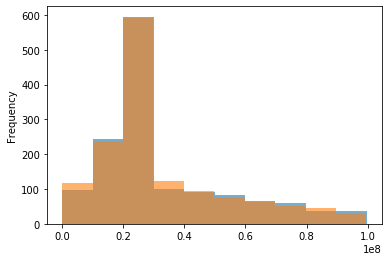

In [5]:
#we'll be looking at 'no_lasting_investment' and 'last_investment' and look at the similarities in both columns
#Both the histogram is overlaped to see the comparsion in the differences in the values

data['no_lasting_investmen'].plot(kind='hist', alpha=0.6), data['lasting_investment'].plot(kind='hist', alpha=0.6)


As we are observing the difference between the 'no_lasting_investment' and 'lasting_investment' is very minimum and has almost every value similiar, so it safe to  exclude the column 'no_lasting_investment' as it would replicate the data points.

In [6]:
data = data.drop('no_lasting_investmen', axis=1)
data.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,other_expenses,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,28203066,0,0,0,0,30028818,31363432,0,28411718,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,28203066,0,0,0,0,30028818,31363432,0,28411718,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,28203066,0,0,0,0,30028818,31363432,0,28411718,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,44042267,0,1,0,1,22288055,18751329,0,7781123,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,74503502,1,0,0,0,53384566,20731006,1,20100562,0


In [7]:
data.shape

(1429, 22)

### Exploratory Data Analysis

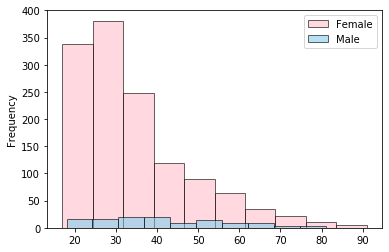

In [8]:
data[data['sex']==1]['Age'].plot(kind='hist', edgecolor='black', color='pink', alpha=0.6, label='Female')
data[data['sex']==0]['Age'].plot(kind='hist', edgecolor='black',color='skyblue', alpha=0.6, label='Male')
plt.legend()

As now here we observe that the number of Female patients are way higher that the male patients. The most number of patients in age group of 20-30, where there are almost 50% of the total patients

For the Males, the distribution is very flat among the age group

In [9]:
data[data['Married']==0]['Number_children'].astype('category')

4       4
6       1
10      0
11      2
20      0
       ..
1401    3
1403    0
1407    0
1426    0
1428    4
Name: Number_children, Length: 325, dtype: category
Categories (10, int64): [0, 1, 2, 3, ..., 6, 7, 8, 9]

In [10]:
#There are many irregularities in the 'Married' and 'Number_Children' 

data[data['Married']==0]['Number_children'].value_counts()

0    93
3    58
1    55
2    47
4    33
5    21
6     9
7     5
8     3
9     1
Name: Number_children, dtype: int64

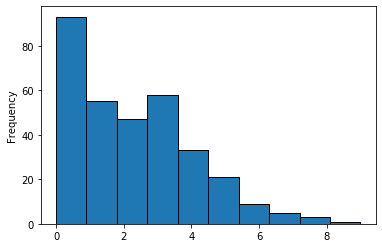

In [11]:
data[data['Married']==0]['Number_children'].astype
data[data['Married']==0]['Number_children'].plot(kind='hist', edgecolor='black')

This distribution is of the unmarried patients which has registered having Children. This is a data error, an unmarried patient may have adopted 2-3 children, but having 9 children can be a possible error.

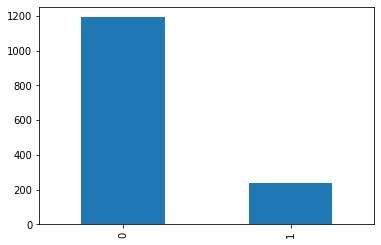

In [12]:
#Looking at the ratio of the depressed patients

data['depressed'].value_counts().plot(kind='bar')

Here we see that, in our data only 20% of the patients has been registered to be depressed. If the inbalance in the data affects the model too much, many techniques can be used to encounter this problem by undersampling, oversampling, using k-folds, generating sythetic data points.

In [13]:
#looking at the correlation matrix

corr = data.iloc[:, 2:].corr()
corr.style.background_gradient(cmap='coolwarm')

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,depressed
sex,1.000000,-0.159376,0.282472,0.214297,-0.072137,0.180664,0.022316,0.028602,0.006637,-0.003493,0.055458,-0.032950,0.067467,0.087322,0.101543,0.017828,0.070757,-0.025092,0.037923,-0.003519
Age,-0.159376,1.000000,-0.396944,-0.138448,-0.377146,-0.073936,0.008316,0.045368,-0.026685,-0.036599,0.026270,-0.055884,0.125569,-0.028204,-0.087054,-0.009173,-0.009428,-0.066347,0.045714,0.105721
Married,0.282472,-0.396944,1.000000,0.227206,0.218406,0.246808,-0.015317,-0.045356,0.009164,0.024518,0.031676,0.023690,0.007212,-0.032171,0.044150,-0.043032,0.036919,0.017792,-0.000606,-0.062155
Number_children,0.214297,-0.138448,0.227206,1.000000,0.175165,0.781731,0.016195,-0.014358,0.027850,-0.000618,0.001611,-0.019415,0.061140,0.032514,0.065935,0.018512,0.052273,-0.016731,0.042988,0.003823
education_level,-0.072137,-0.377146,0.218406,0.175165,1.000000,0.130236,0.014534,-0.011658,0.046626,0.010132,-0.043732,0.010843,-0.033861,0.014032,0.037305,-0.054515,0.010648,0.044067,0.005361,-0.098043
total_members,0.180664,-0.073936,0.246808,0.781731,0.130236,1.000000,0.015472,-0.040372,0.036630,-0.005937,0.009988,-0.047026,0.093959,0.008520,0.070958,0.026157,0.072907,-0.043622,0.044341,0.035056
gained_asset,0.022316,0.008316,-0.015317,0.016195,0.014534,0.015472,1.000000,-0.005730,-0.004477,0.073981,0.039911,0.028493,0.126403,0.050641,0.075120,0.028656,0.058569,0.022879,0.033085,-0.004402
durable_asset,0.028602,0.045368,-0.045356,-0.014358,-0.011658,-0.040372,-0.005730,1.000000,-0.038218,0.020984,0.086410,0.078162,0.064366,0.015376,0.020218,0.024395,0.027892,0.094494,0.246894,0.040505
save_asset,0.006637,-0.026685,0.009164,0.027850,0.046626,0.036630,-0.004477,-0.038218,1.000000,0.023722,0.028680,0.039431,0.038605,0.067390,0.053795,0.022900,0.040168,0.061984,0.034959,0.009059
living_expenses,-0.003493,-0.036599,0.024518,-0.000618,0.010132,-0.005937,0.073981,0.020984,0.023722,1.000000,0.055057,0.089769,0.074143,0.031858,0.023410,0.115553,0.003512,0.083639,0.040247,-0.028213


### Dependent and Independent Variable

In [14]:
#Assigning the independent and target variable

x=data.drop(['depressed','Survey_id', 'Ville_id'], axis=1)
y=data['depressed']

## Feature engineering and selection

In [15]:
#Feature engineering done using the SelectKBest function using F-regression as most of the variables are numeric

from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression

test = SelectKBest(score_func = f_classif, k=10)
fit = test.fit(x,y)

features = fit.transform(x)
print(features.shape)

(1429, 10)


In [16]:
fit.get_support()
features = pd.DataFrame(x.iloc[:,fit.get_support()])
features.head()

,Age,Married,education_level,total_members,durable_asset,living_expenses,other_expenses,incoming_business,incoming_no_business,incoming_agricultural
0,28,1,10,5,22861940,26692283,28203066,0,0,30028818
1,23,1,8,5,22861940,26692283,28203066,0,0,30028818
2,22,1,9,5,22861940,26692283,28203066,0,0,30028818
3,27,1,10,4,19698904,397715,44042267,0,1,22288055
4,59,0,10,6,17352654,80877619,74503502,0,0,53384566


## Feature Scaling

In [17]:
#Scaling the data using PowerTransformer as data is mostly skewed with a single tail.

from sklearn.preprocessing import PowerTransformer
scale = PowerTransformer()
x=scale.fit_transform(features)

# Model Building

In [18]:
#Function for performance

from sklearn.metrics import log_loss, confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import plot_confusion_matrix

#Creating two functions to show us all the performance matrices at any point in the project

def per(model, x_train, y_train, x_test, y_test):
    cross = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
    
    accuracy = cross_val_score(model, x_test, y_test, scoring='accuracy', cv=cross, n_jobs=7)
    print('Accuracy: ' + str(round(np.mean(accuracy),2)))
    
    precision = cross_val_score(model, x_test, y_test, scoring='precision', cv=cross, n_jobs=7)
    print('Precision: ' + str(round(np.mean(precision),2)))
    
    f1= cross_val_score(model, x_test, y_test, scoring='f1', cv=cross, n_jobs=7)
    print('F1 Score: ' + str(round(np.mean(f1),2)))
    
    roc= cross_val_score(model, x_test, y_test, scoring='roc_auc', cv=cross, n_jobs=7)
    print("ROC: " + str(round(np.mean(roc),2)))
    
    recall = cross_val_score(model, x_test, y_test, scoring='recall', cv=cross, n_jobs=7)
    print('Recall: ' +str(round(np.mean(recall),2)))
    plot_confusion_matrix(model, x_test, y_test)
    plt.show()
    

def total_confusion_matrix(model,x,y):
    total_matrix=[]
    cross = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
    for train_i, test_i in cross.split(x,y):
        x_train, x_test = x[train_i], x[test_i]
        y_train, y_test = y[train_i], y[test_i]
        model.fit(x_train, y_train)
        total_matrix.append(confusion_matrix(y_test, model.predict(x_test)))
    print('The total of confusion matrix in cross validation:')
    sns.heatmap(sum(total_matrix), annot=True)
    plt.title('Total Confusion Matrix')
    plt.show()
    print('\n The Mean confusion matrix in cross Validation:')
    sns.heatmap(sum(total_matrix)/len(total_matrix), annot=True)
    plt.title('Mean Confusion Matrix')
    plt.show()

In [19]:
# Import the train test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


from imblearn.under_sampling import RandomUnderSampler
sm = RandomUnderSampler(sampling_strategy='majority')
x_train, y_train = sm.fit_resample(x_train, y_train)

from imblearn.over_sampling import RandomOverSampler
sm = RandomOverSampler(sampling_stratergy='minority')
x_train, y_train = sm.fit_resample(x_train, y_train)

In [20]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0, sampling_strategy='minority')
x_train, y_train = sm.fit_resample(x_train, y_train)

In [21]:
# import the appropriate models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Logistic Regression

LogisticRegression(C=0.1, class_weight='balanced', random_state=0,
                   solver='liblinear')
Accuracy: 0.59
Precision: 0.17
F1 Score: 0.24
ROC: 0.54
Recall: 0.44


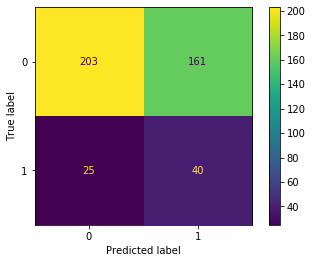

In [22]:
# Fitting the model to the training set

param_grid = {
    'C': [0.1, 0.01,100,10,1.0],
    #'fit_intercept': ['True', 'False'],
    'max_iter':[100,200,300,400,500],
    'solver': ['newton-cg', 'liblinear','sag','saga'],
    'penalty' : ['l2']

}

log_model = LogisticRegression(class_weight='balanced', random_state=0)

grid_model = GridSearchCV(log_model, param_grid, cv=5, return_train_score=True)
grid_model.fit(x_train, y_train)
print(grid_model.best_estimator_)

best_model_lg = grid_model.best_estimator_
best_model_lg.fit(x_train, y_train)


# Predicting the test set
per(best_model_lg, x_train, y_train, x_test, y_test)

The total of confusion matrix in cross validation:


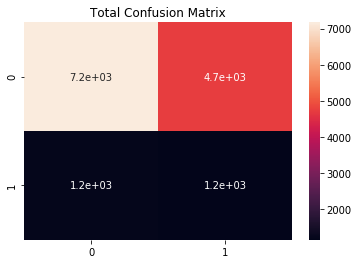


 The Mean confusion matrix in cross Validation:


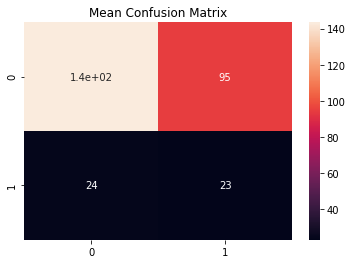

In [23]:
total_confusion_matrix(best_model_lg, x,y)

Accuracy: 0.58
Precision: 0.17
F1 Score: 0.25
ROC: 0.55
Recall: 0.47


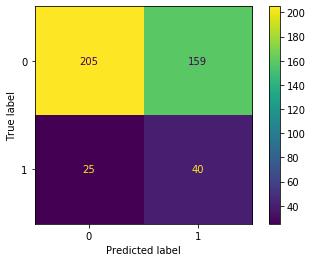

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

ada_model_lg = AdaBoostClassifier(best_model_lg, n_estimators=50)
ada_model_lg.fit(x_train, y_train)

per(ada_model_lg, x_train, y_train, x_test, y_test)

The total of confusion matrix in cross validation:


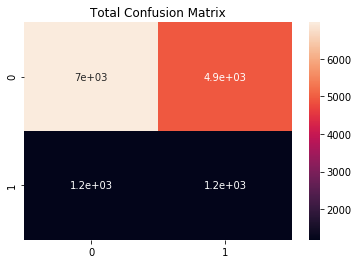


 The Mean confusion matrix in cross Validation:


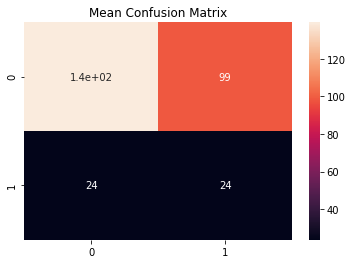

In [25]:
total_confusion_matrix(ada_model_lg, x,y)

### Random Forest

RandomForestClassifier(bootstrap='True', class_weight='balanced', max_depth=25,
                       max_features='log2', max_leaf_nodes=17,
                       min_samples_leaf=3, n_estimators=25, n_jobs=7,
                       random_state=0)
Accuracy: 0.79
Precision: 0.26
F1 Score: 0.22
ROC: 0.55
Recall: 0.2


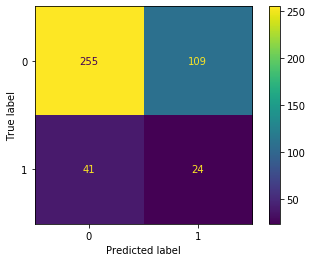

The total of confusion matrix in cross validation:


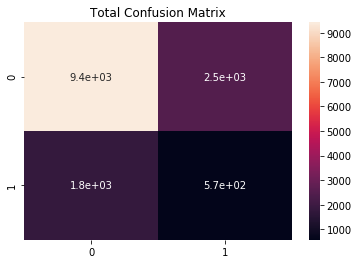


 The Mean confusion matrix in cross Validation:


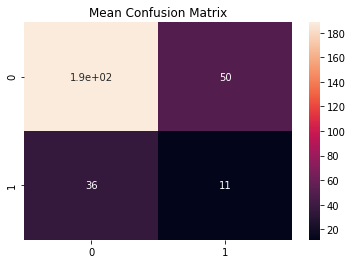

In [26]:
#Building random Forest

param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=7, stop=25, num=2)],
    'max_features':['log2', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(start=7, stop=25, num=2)],
    'min_samples_leaf': [1,3,5,7],
    'max_leaf_nodes': [11,13,15,17],
    'bootstrap':['True', 'False'],
}

rf_model = RandomForestClassifier(random_state=0, class_weight='balanced', n_jobs=7)

grid_model = GridSearchCV(rf_model, param_grid, return_train_score=True, n_jobs=7, cv=10)
grid_model.fit(x_train, y_train)

print(grid_model.best_estimator_)
best_model_rf = grid_model.best_estimator_

best_model_rf.fit(x_train, y_train)

per(best_model_rf, x_train, y_train, x_test, y_test)

total_confusion_matrix(best_model_rf, x,y)

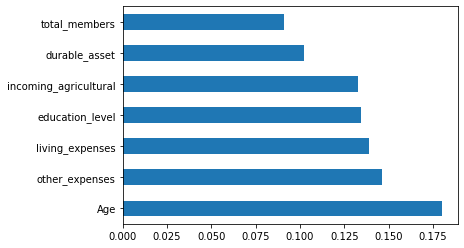

In [27]:
best_model_rf.feature_importances_
pd.Series(best_model_rf.feature_importances_, index=features.columns).nlargest(7).plot(kind='barh')

Accuracy: 0.81
Precision: 0.28
F1 Score: 0.15
ROC: 0.54
Recall: 0.12


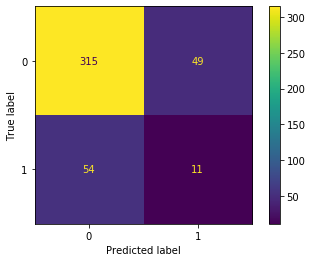

The total of confusion matrix in cross validation:


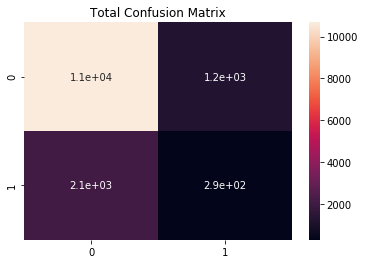


 The Mean confusion matrix in cross Validation:


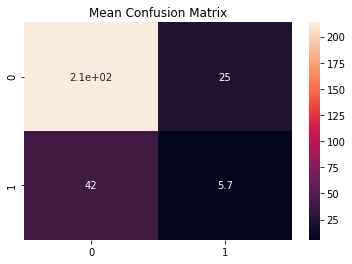

In [39]:
from sklearn.ensemble import AdaBoostClassifier

ada_model_rf = AdaBoostClassifier(best_model_rf, n_estimators=100, learning_rate=2)
ada_model_rf.fit(x_train, y_train)

per(ada_model_rf, x_train, y_train, x_test, y_test)
total_confusion_matrix(ada_model_rf, x,y)

### Knn

KNeighborsClassifier(weights='distance')
Accuracy: 0.82
Precision: 0.28
F1 Score: 0.14
ROC: 0.59
Recall: 0.1


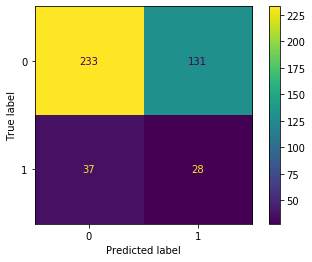

The total of confusion matrix in cross validation:


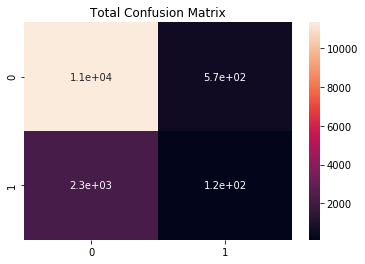


 The Mean confusion matrix in cross Validation:


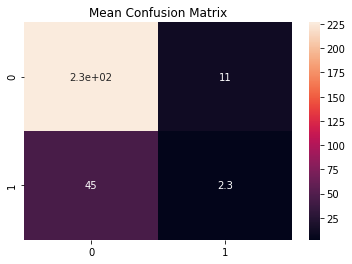

In [29]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [5,7,9],
    'weights' : ['uniform', 'distance'],
    'algorithm' :['auto', 'ball_tree', 'kd_tree']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, return_train_score=True, n_jobs=8)
grid_search.fit(x_train, y_train)

best_model_knn = grid_search.best_estimator_
best_model_knn.fit(x_train, y_train)

print(f'{best_model_knn}')

per(best_model_knn, x_train, y_train, x_test, y_test)

total_confusion_matrix(best_model_knn, x,y)

Accuracy: 0.83
Precision: 0.35
F1 Score: 0.15
ROC: 0.61
Recall: 0.1


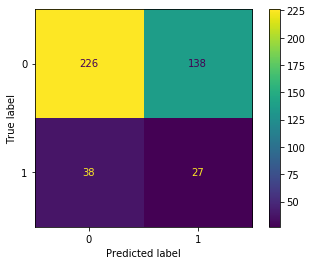

The total of confusion matrix in cross validation:


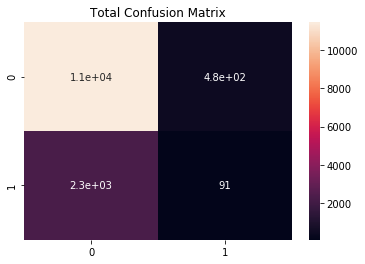


 The Mean confusion matrix in cross Validation:


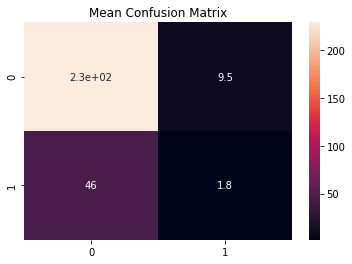

In [30]:
#bagging for KNN  
b = BaggingClassifier(best_model_knn, n_estimators=100, random_state=0)

b.fit(x_train, y_train)
b.score(x_train, y_train), b.score(x_test, y_test)
per(b, x_train, y_train, x_test, y_test)

total_confusion_matrix(b, x,y)

After applying various models as well as model improving techniques, it was found that even though random forest performed better for training dataset, kNN worked better on the the testing dataset with an accuracy of 83% when used with baaging classifier. If the dataset would have been large enough to remove the biasedness from the data, our models could have performed better and hence can be used in reial life in predicting the depression with the given features.

## THANK YOU!